In [1]:
from models import (
    DeterministicCompartmentalModel, 
    DeterministicCompartmentalModelRunner,
    DeterministicCompartmentalModelScenario,
    SingleInterventionScenario, 
    CampParams,
)

In [2]:
camp_params = CampParams.load_from_json("/Users/billyzhaoyh/Desktop/AIforGoodSimulator/epi-models/models/config/sample_input.json")

In [3]:
runner = DeterministicCompartmentalModelRunner(camp_params)

{'transmission_reduction_factor': 1, 'isolation_capacity': 0, 'remove_symptomatic_rate': 0, 'first_high_risk_category_n': 2, 'remove_high_risk_rate': 0, 'icu_capacity': 6}
{'transmission_reduction_factor': 0.9375, 'isolation_capacity': 200, 'remove_symptomatic_rate': 200.0, 'first_high_risk_category_n': 1, 'remove_high_risk_rate': 200.0, 'icu_capacity': 6}


In [4]:
runner.do_nothing_scenario.__dict__

{'baseline_param_dict': {'transmission_reduction_factor': 1,
  'isolation_capacity': 0.0,
  'remove_symptomatic_rate': 0.0,
  'first_high_risk_category_n': 2,
  'remove_high_risk_rate': 0.0,
  'icu_capacity': 0.0003}}

In [5]:
runner.camp_baseline.__dict__

{'baseline_param_dict': {'transmission_reduction_factor': 0.9375,
  'isolation_capacity': 0.01,
  'remove_symptomatic_rate': 0.01,
  'first_high_risk_category_n': 1,
  'remove_high_risk_rate': 0.01,
  'icu_capacity': 0.0003}}

In [6]:
assert runner.model.infection_matrix.shape == (8, 8)

In [7]:
do_nothing_baseline, camp_baseline = runner.run_baselines()

[########################################] | 100% Completed | 33.9s
[########################################] | 100% Completed | 39.7s


In [8]:
do_nothing_baseline = do_nothing_baseline * 20000

In [13]:
do_nothing_baseline

,Susceptible: 0-9,Exposed: 0-9,Infected (symptomatic): 0-9,Asymptomatically Infected: 0-9,Recovered: 0-9,Hospitalised: 0-9,Critical: 0-9,Deaths: 0-9,Offsite: 0-9,Quarantined: 0-9,...,Exposed,Infected (symptomatic),Asymptomatically Infected,Recovered,Hospitalised,Critical,Deaths,Offsite,Quarantined,No ICU Care
0,2999.700000,0.000000e+00,0.150000,0.150000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00
1,2999.532827,1.522022e-01,0.124573,0.127343,0.062829,0.000220,9.728993e-07,8.306012e-07,0.0,0.0,...,1.127533,0.846048,0.843580,0.378630,0.041479,0.000183,0.000156,0.0,0.0,7.365308e-04
2,2999.383810,2.623772e-01,0.112868,0.122071,0.118476,0.000377,1.345779e-06,6.187887e-06,0.0,0.0,...,1.952541,0.804557,0.796366,0.720926,0.073438,0.000257,0.001172,0.0,0.0,2.493697e-03
3,2999.237060,3.520314e-01,0.110072,0.127627,0.172668,0.000500,1.444275e-06,1.775340e-05,0.0,0.0,...,2.637850,0.834422,0.818839,1.062192,0.101876,0.000284,0.003418,0.0,0.0,4.535740e-03
4,2999.082108,4.341380e-01,0.113468,0.140459,0.229153,0.000605,1.432611e-06,3.551671e-05,0.0,0.0,...,3.280854,0.913661,0.889786,1.426109,0.130271,0.000294,0.006989,0.0,0.0,6.657419e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,283.210188,1.430540e-06,0.000003,0.000004,2714.312025,0.000002,9.215697e-07,2.477776e+00,0.0,0.0,...,0.000007,0.000018,0.000013,17703.781385,0.000772,0.000296,847.604441,0.0,0.0,8.693411e-07
197,283.210188,1.246362e-06,0.000002,0.000003,2714.312027,0.000002,9.035541e-07,2.477776e+00,0.0,0.0,...,0.000006,0.000015,0.000011,17703.781451,0.000694,0.000290,847.604465,0.0,0.0,3.352484e-07
198,283.210188,1.085893e-06,0.000002,0.000003,2714.312028,0.000002,8.795826e-07,2.477776e+00,0.0,0.0,...,0.000005,0.000013,0.000010,17703.781510,0.000624,0.000283,847.604489,0.0,0.0,1.787325e-07
199,283.210187,9.460817e-07,0.000002,0.000003,2714.312029,0.000002,8.511179e-07,2.477776e+00,0.0,0.0,...,0.000004,0.000012,0.000008,17703.781563,0.000561,0.000274,847.604512,0.0,0.0,7.701509e-08


In [9]:
sim_groups = do_nothing_baseline.groupby('R0')

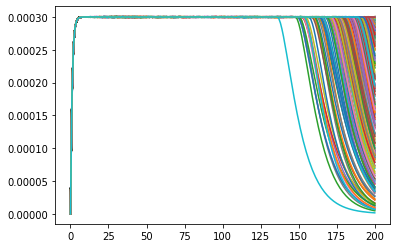

In [15]:
for index,group in sim_groups:
    group['Critical'].plot()

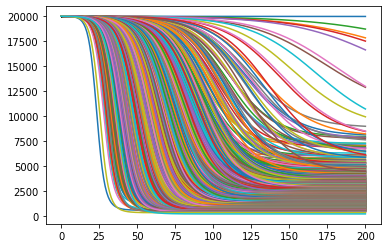

In [14]:
for index,group in sim_groups:
    group['Susceptible'].plot()

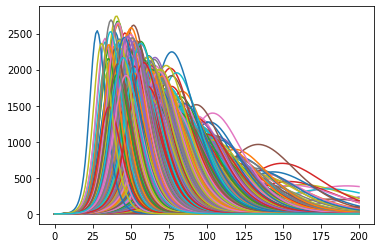

In [17]:
for index,group in sim_groups:
    group['Infected (symptomatic)'].plot()

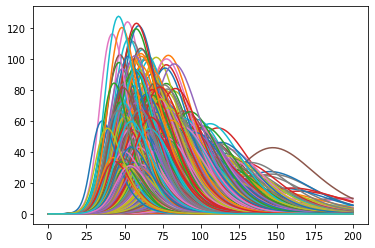

In [19]:
for index,group in sim_groups:
    group['No ICU Care'].plot()

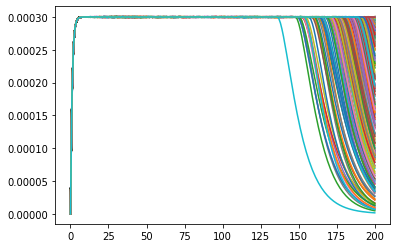

In [20]:
for index,group in sim_groups:
    group['Critical'].plot()

In [21]:
sim_groups = camp_baseline.groupby('R0')

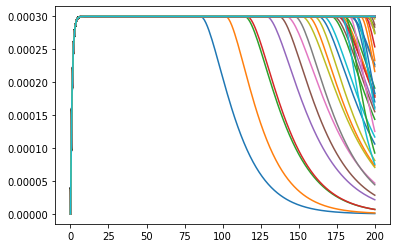

In [23]:
for index,group in sim_groups:
    group['Critical'].plot()

In [ ]:
#TODO: now need to test if all the interventions are working well